<h3> Distribuição Uniforme </h3>

<h5>Neste exemplo vamos considerar n valores inteiros de 0 a k−1 distribuídos de acordo com uma distribuição uniform </h5>

In [2]:
import numpy as np
k = 10
n = 10**6
np.random.seed(1)
X = np.random.randint(0,k,n)

In [3]:
from collections import Counter
labels, frequency = zip(*sorted(Counter(X).items()))
print('Possíveis valores de X', labels)
print('Frequência: ', frequency)

Possíveis valores de X (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Frequência:  (100094, 99413, 100108, 100175, 100294, 100042, 99842, 100085, 99611, 100336)


In [4]:
import matplotlib.pyplot as plt
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência')
plt.xticks(labels)
plt.bar(labels, frequency)


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

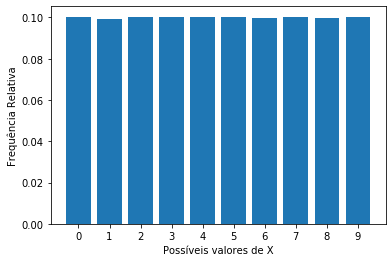

In [5]:
rel_frequency = np.array(frequency) / sum(frequency)
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
plt.xticks(labels)
plt.bar(labels, rel_frequency)

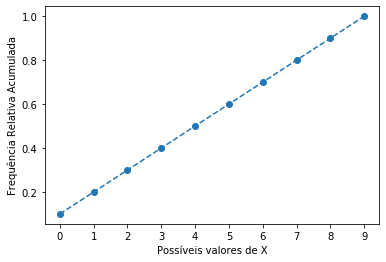

In [6]:
rel_frequency = np.array(frequency) / sum(frequency)
cumsum_rel_frequency = np.cumsum(rel_frequency)
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa Acumulada')
plt.xticks(labels)
plt.plot(labels, cumsum_rel_frequency, "o--")

In [7]:
import numpy as np
mean = 5
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.normal(mean, sd,n)
X

array([8.24869073, 3.77648717, 3.9436565 , ..., 3.8076781 , 7.37207976,
       5.62679603])

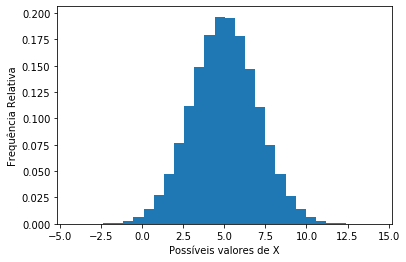

In [8]:
bins = 30
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
count, bins, ignored = plt.hist(X, bins=bins, density=True)
plt.show()

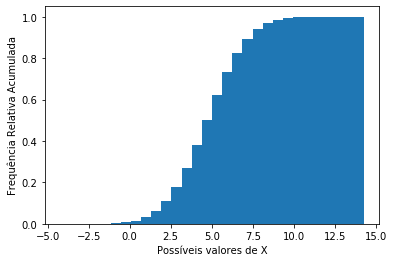

In [9]:
bins = 30
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa Acumulada')
count, bins, ignored = plt.hist(X, bins=bins, density=True, cumulative=True)
plt.show()

<h3> Poisson </h3>

In [10]:
import numpy as np
lambda_ = 5
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.poisson(lambda_, n)
X

array([2, 2, 4, ..., 7, 7, 2])

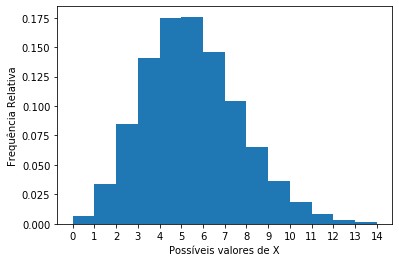

In [11]:
bins = 15
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
plt.xticks(range(0,bins))
count, bins, ignored = plt.hist(X, bins=range(0,bins), density=True)
plt.show()

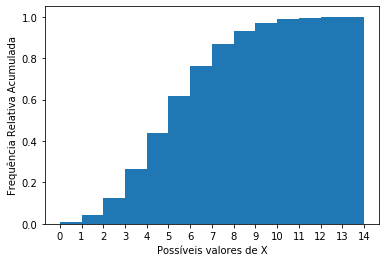

In [12]:
bins = 15
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa Acumulada')
plt.xticks(range(0,bins))
count, bins, ignored = plt.hist(X, bins=range(0,bins), density=True, cumulative=True)
plt.show()

In [13]:
from scipy.stats import skew
mean = 20
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.normal(mean, sd,n) ** 4
print('skewness', skew(X))

skewness 0.8972842641338391


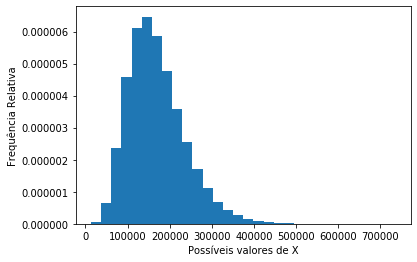

In [14]:
bins = 30
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
count, bins, ignored = plt.hist(X, bins=bins, density=True)
plt.show()

In [15]:
from scipy.stats import kurtosis
mean = 8
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.normal(mean, sd,n) * np.random.uniform(-mean, mean,n)
print('curtosis', kurtosis(X))

curtosis -0.7916954454117038


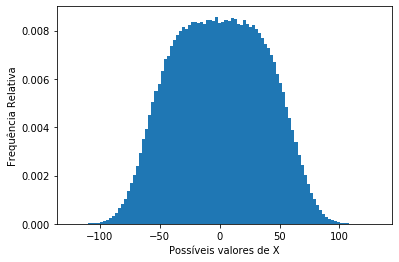

In [16]:
bins = 100
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
count, bins, ignored = plt.hist(X, bins=bins, density=True)
plt.show()

In [18]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
data_iris=pd.DataFrame(iris['data'], columns=iris['feature_names'])
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
data  = pd.DataFrame({'X' : data_iris["petal length (cm)"], 'Y' : data_iris["petal width (cm)"]})
data2 = pd.DataFrame({'X' : data_iris["petal length (cm)"], 'Y' : data_iris["sepal width (cm)"]})

data.head()

,X,Y
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


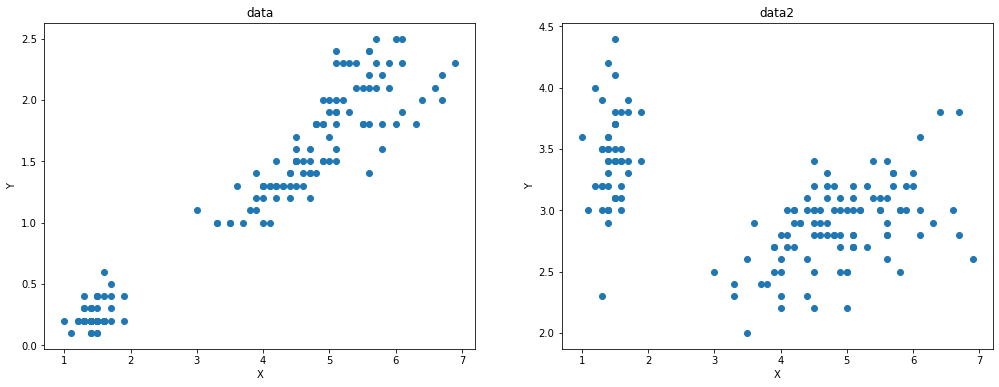

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
                       
ax[0].scatter(data.X, data.Y)                       
ax[0].set_title('data')
ax[0].set_xlabel('X')                       
ax[0].set_ylabel('Y')                       
                       
ax[1].scatter(data2.X, data2.Y)                       
ax[1].set_title('data2')
ax[1].set_xlabel('X')                       
ax[1].set_ylabel('Y') 
                       
plt.show()                       

In [31]:
n=6
dt=data.sample(n, random_state=1)
dt2=data2.sample(n, random_state=1)
dt.head()

,X,Y
14,1.2,0.2
98,3.0,1.1
75,4.4,1.4
16,1.3,0.4
131,6.4,2.0


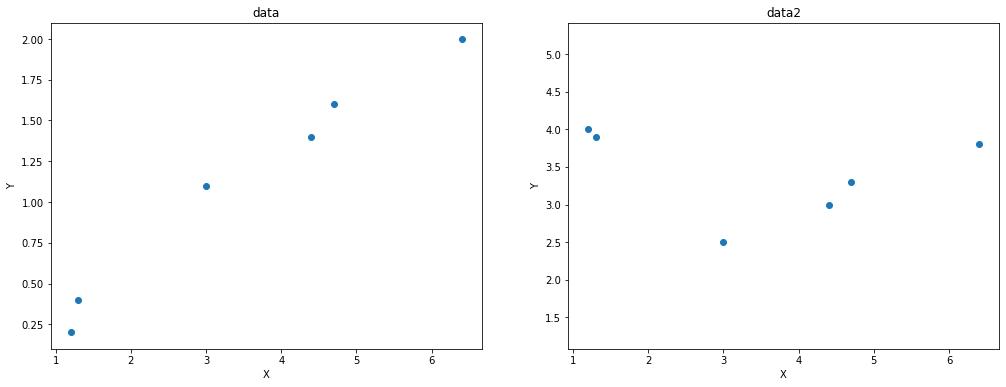

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
                       
ax[0].scatter(dt.X, dt.Y)                       
ax[0].set_title('data')
ax[0].set_xlabel('X')                       
ax[0].set_ylabel('Y')                       
                       
ax[1].scatter(dt2.X, dt2.Y)  
ax[1].axis('equal')
ax[1].set_title('data2')
ax[1].set_xlabel('X')                       
ax[1].set_ylabel('Y') 
                       
plt.show()  

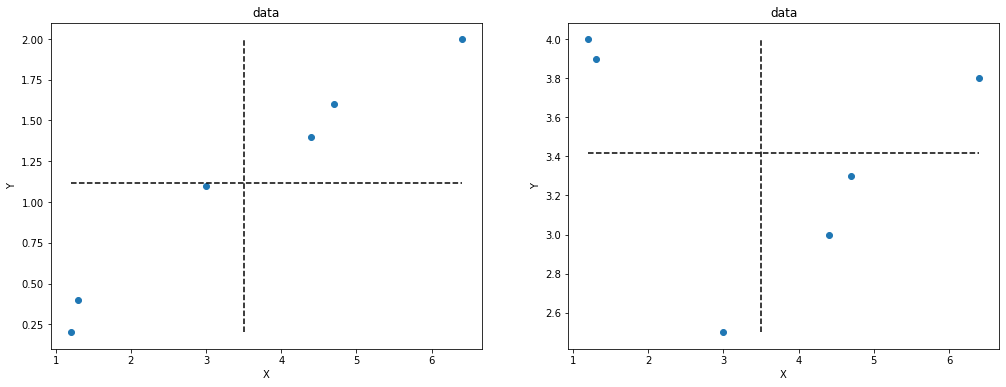

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax[0].scatter(dt.X, dt.Y)
ax[0].hlines(dt.Y.mean(), xmin = dt.X.min(), xmax = dt.X.max(), linestyles="--", label="Y.mean")
ax[0].vlines(dt.X.mean(), ymin = dt.Y.min(), ymax = dt.Y.max(), linestyles="--", label="X.mean")
ax[0].set_title('data')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(dt2.X, dt2.Y)
ax[1].hlines(dt2.Y.mean(), xmin = dt2.X.min(), xmax = dt2.X.max(), linestyles="--", label="Y.mean")
ax[1].vlines(dt2.X.mean(), ymin = dt2.Y.min(), ymax = dt2.Y.max(), linestyles="--", label="X.mean")
ax[1].set_title('data')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

plt.show()

In [40]:
def scatter_square_diff(dt, ax):
    
    from matplotlib.patches import Rectangle
    dt['diffX'] = dt.X - dt.X.mean()
    dt['diffY'] = dt.Y - dt.Y.mean()
    
    ax.scatter(dt.X, dt.Y)
    ax.hlines(dt.Y.mean(), xmin = dt.X.min(), xmax = dt.X.max(), linestyles="--", label='Y.mean')
    ax.vlines(dt.X.mean(), ymin = dt.Y.min(), ymax = dt.Y.max(), linestyles="--", label='X.mean')

    for i in range(0,len(dt)):
        color  = 'blue' if (dt.diffX.iloc[i] * dt.diffY.iloc[i] > 0 ) else 'red'    
        rect = Rectangle( 
            xy = (dt.X.iloc[i], dt.Y.iloc[i]), 
            width = -dt.diffX.iloc[i], 
            height = -dt.diffY.iloc[i], 
            linewidth = 1, edgecolor = color,facecolor = color, alpha = 0.2)
        ax.add_patch(rect)
   
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()    
    return ax

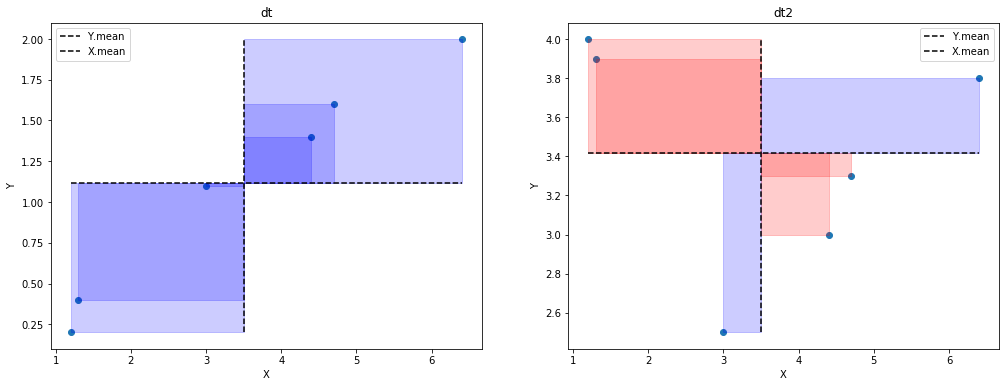

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

ax[0] = scatter_square_diff(dt, ax[0])
ax[0].set_title('dt')

ax[1] = scatter_square_diff(dt2, ax[1])
ax[1].set_title('dt2')

plt.show()

In [43]:
dt_soma_quadrados = np.sum( (dt.X - dt.X.mean()) * (dt.Y - dt.Y.mean()) )
print('dt_soma_quadrados: ', dt_soma_quadrados.round(2) )
dt_cov = dt_soma_quadrados / (n-1)
print('dt_cov: ', dt_cov.round(2) )

dt_soma_quadrados:  7.09
dt_cov:  1.42


In [44]:
dt2_soma_quadrados = np.sum( (dt2.X - dt2.X.mean()) * (dt2.Y - dt2.Y.mean()) )
print('dt2_soma_quadrados: ', dt2_soma_quadrados.round(2) )
dt2_cov = dt2_soma_quadrados / (n-1)
print('dt2_cov: ', dt2_cov.round(2) )

dt2_soma_quadrados:  -1.35
dt2_cov:  -0.27


In [46]:
dt_cor = dt_cov / ( dt.X.std() * dt.Y.std())
dt_cor.round(2)

0.99

In [47]:
dt2_cor = dt2_cov / (dt2.X.std() * dt2.Y.std())
dt2_cor.round(2)

-0.22

In [49]:
dt_r2 = dt_cor**2
dt_r2.round(2)

0.98

In [50]:
dt2_r2 = dt2_cor**2
dt2_r2.round(2)

0.05